In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('bookpage.jpg')

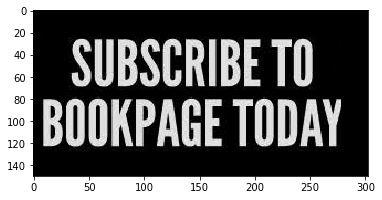

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
plt.imshow(gray, cmap = 'gray')

In [4]:
# blur = cv2.GaussianBlur(img, (11, 11), 25)

In [5]:
# cv2.imshow('e', blur)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [6]:
# image = cv2.addWeighted(img, 1.5, blur, -0.5, 0, img)
# cv2.imshow('x', image)
# cv2.imshow('y', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [7]:
# blur = cv2.medianBlur(gray, 3)
# plt.imshow(blur, cmap = 'gray')

In [8]:
ret1,thresh1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

In [ ]:
cv2.imshow('thresh1', thresh1)
cv2.imshow('thresh', thresh)
cv2.waitKey(1)
cv2.destroyAllWindows()

In [149]:
th = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

In [150]:
# denoise 
# kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,  3))
# dilated = cv2.dilate(th, kernel, iterations=9)  

In [151]:
_,contours1 , hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img, contours1, -1, (255,0,0), 3)
len(contours1)

24

In [77]:
cv2.imshow('y', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
_,contours2 , hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img, contours2, -1, (0,255,0), 3)
len(contours2)

31

In [39]:
cv2.imshow('y', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [152]:
for contour in contours1:
    
    [x, y, w, h] = cv2.boundingRect(contour)
#     print(x, y, w, h)
    if h > 300 and w > 300:
        continue
    
    if h < 40 and w < 35:
        continue
        
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)
    
# for contour in contours2:
# #     print(x, y, w, h)
#     [x, y, w, h] = cv2.boundingRect(contour)
    
#     if h > 300 and w > 300:
#         continue
    
#     if h < 40 and w < 35:
#         continue
        
#     cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 2)

In [153]:
# cv2.imshow('captcha_result', img)
# cv2.imshow('captcha_relt', th)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [154]:
# cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [155]:
# contours1[0]

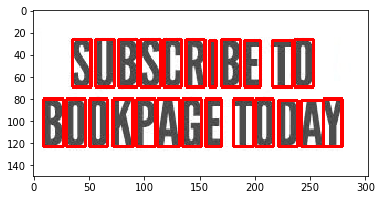

In [156]:
plt.imshow(img)

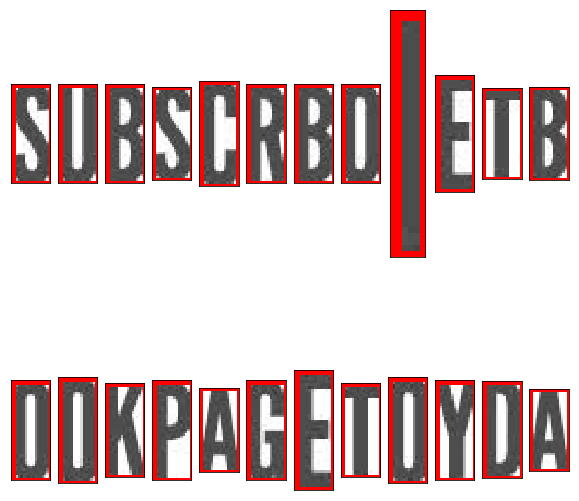

In [157]:
fig, axes = plt.subplots(2, 12, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    c = contours1[23-i]
    [x, y, w, h] = cv2.boundingRect(c)
    ax.imshow(img[y:y+h, x:x+w, :])
    ax.set_xticks([])
    ax.set_yticks([])

In [158]:
# c = contours1[0]
# [x, y, w, h] = cv2.boundingRect(c)
# print(x, y, w, h)
# plt.imshow(img[y:y+h, x:x+w, :])